In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

header_list = ["station", "measure", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df = pd.read_csv ('data/allStations_testError.csv',names=header_list)
dfTh = pd.read_csv ('data/th_Stations_testErrorTH.csv',names=header_list)

In [2]:
dfTh

,station,measure,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Mollet,meanE,2.658405,2.686351,3.130454,3.097081,6.105526,1.387439,1.674602
1,Mollet,mStdvE,1.775889,2.580663,2.528568,2.687372,3.278489,0.867878,1.335366
2,QuatreCamins,meanE,1.830567,1.588231,3.065825,4.080146,3.234686,1.444622,1.539863
3,QuatreCamins,mStdvE,1.187802,0.687174,2.356301,3.075373,1.881157,0.603890,0.782377
4,SantBoi,meanE,2.796774,2.490912,1.878068,2.034950,7.879983,4.519246,6.954308
5,SantBoi,mStdvE,1.643126,1.757085,1.311375,1.016374,4.364833,1.221391,3.078230


In [3]:
df_mean=df[df.measure=='meanE'].reindex()
df_mean.drop('measure', inplace=True, axis=1)
dfTh_mean=dfTh[dfTh.measure=='meanE'].reindex()
dfTh_mean.drop('measure', inplace=True, axis=1)

In [4]:
df_stdv=df[df.measure=='mStdvE'].reindex()
df_stdv.drop('measure', inplace=True, axis=1)
dfTh_stdv=dfTh[dfTh.measure=='mStdvE'].reindex()
dfTh_stdv.drop('measure', inplace=True, axis=1)

In [5]:
dfTh_stdv

,station,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1,Mollet,1.775889,2.580663,2.528568,2.687372,3.278489,0.867878,1.335366
3,QuatreCamins,1.187802,0.687174,2.356301,3.075373,1.881157,0.603890,0.782377
5,SantBoi,1.643126,1.757085,1.311375,1.016374,4.364833,1.221391,3.078230


In [6]:
df_meanT=df_mean.T
df_meanT.rename(columns=df_meanT.iloc[0], inplace = True)
df_meanT.drop(df_meanT.index[0], inplace = True)
df_meanT

,Cerdanyola,Granollers,Mollet,PratDelLlobregat,QuatreCamins,SantBoi,SantSadurni,Vilanova
Monday,4.79471,2.31445,4.69314,2.60449,2.65875,3.90041,3.11747,2.02549
Tuesday,2.63184,2.14369,2.24553,2.28393,2.09672,3.06032,2.23098,1.18376
Wednesday,3.90001,2.15862,2.10918,2.57989,4.42488,2.19305,2.37264,1.38423
Thursday,3.66359,1.95586,2.09174,3.47604,5.09276,2.89728,5.64878,1.24633
Friday,6.01313,2.44052,6.16926,5.6687,3.49648,6.03018,4.17256,1.90538
Saturday,1.83874,1.31665,1.31195,1.94719,1.34836,4.86802,1.53752,0.909097
Sunday,2.43759,1.09178,1.61972,1.87084,1.52438,7.22425,1.11962,0.585745


In [7]:
df_stdvT=df_stdv.T
df_stdvT.rename(columns=df_stdvT.iloc[0], inplace = True)
df_stdvT.drop(df_stdvT.index[0], inplace = True)
df_stdvT

,Cerdanyola,Granollers,Mollet,PratDelLlobregat,QuatreCamins,SantBoi,SantSadurni,Vilanova
Monday,0,1.20549,2.72,1.02993,1.41029,1.99825,1.59295,1.25449
Tuesday,1.23125,1.06322,1.25827,0.878951,0.964164,1.99822,1.4018,0.624473
Wednesday,1.84909,1.16503,0.98159,1.44371,3.54562,1.37345,1.63161,0.681265
Thursday,3.55589,1.26828,1.26588,1.32659,3.05852,1.72097,3.92331,0.66876
Friday,6.50953,1.16599,2.57582,4.79768,1.91298,2.48263,1.70558,0.919002
Saturday,1.24864,0,0.818816,0.996394,0.523739,1.23041,0.916243,0.460129
Sunday,0.705614,0,1.30206,0.95347,0.772205,3.68303,0.875955,0.331694


<Figure size 432x288 with 0 Axes>

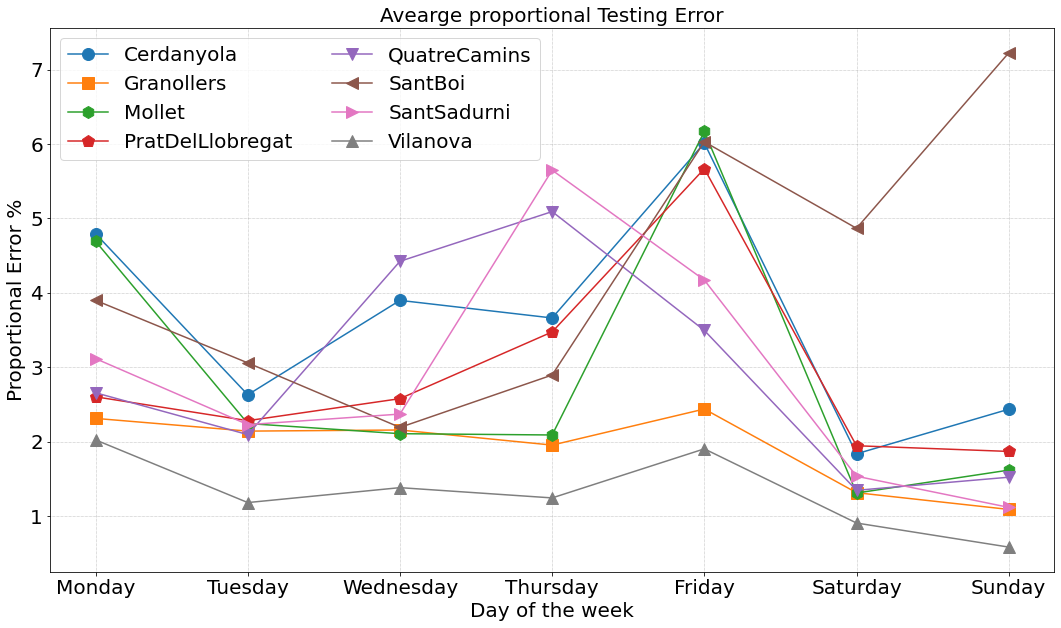

In [8]:
fsize=20
markers=['o','s','h','p','v','<','>','^']
plt.figure();
ax = df_meanT.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)    
plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Day of the week",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best",ncol=2);

In [9]:
df_meanTcomb=df_meanT.copy()
df_meanTcomb.loc['Weekday']=df_meanTcomb.loc[['Monday','Tuesday','Wednesday','Thursday']].mean()
df_meanTcomb.drop(['Monday','Tuesday','Wednesday','Thursday'], inplace = True)
df_meanTcomb.loc['Weekend']=df_meanTcomb.loc[['Saturday','Sunday']].mean()
df_meanTcomb.drop(['Saturday','Sunday'], inplace = True)

In [10]:
df_meanTcomb

,Cerdanyola,Granollers,Mollet,PratDelLlobregat,QuatreCamins,SantBoi,SantSadurni,Vilanova
Friday,6.01313,2.44052,6.16926,5.6687,3.49648,6.03018,4.17256,1.90538
Weekday,3.74754,2.14315,2.7849,2.73609,3.56828,3.01276,3.34247,1.45995
Weekend,2.13817,1.20422,1.46583,1.90902,1.43637,6.04614,1.32857,0.747421


In [11]:
df_stdvTcomb=df_stdvT.copy()
df_stdvTcomb.loc['Weekday']=df_stdvTcomb.loc[['Monday','Tuesday','Wednesday','Thursday']].mean()
df_stdvTcomb.drop(['Monday','Tuesday','Wednesday','Thursday'], inplace = True)
df_stdvTcomb.loc['Weekend']=df_stdvTcomb.loc[['Saturday','Sunday']].mean()
df_stdvTcomb.drop(['Saturday','Sunday'], inplace = True)

In [12]:
df_stdvTcomb

,Cerdanyola,Granollers,Mollet,PratDelLlobregat,QuatreCamins,SantBoi,SantSadurni,Vilanova
Friday,6.50953,1.16599,2.57582,4.79768,1.91298,2.48263,1.70558,0.919002
Weekday,1.65906,1.1755,1.55643,1.16979,2.24465,1.77272,2.13742,0.807248
Weekend,0.977125,0,1.06044,0.974932,0.647972,2.45672,0.896099,0.395912


In [13]:
cols = df_meanTcomb.columns.tolist()
cols_new=[cols[7], cols[1], cols[6], cols[3], cols[0], cols[2], cols[4],  cols[5]]

In [14]:
df_meanTcomb = df_meanTcomb[cols_new]
df_stdvTcomb = df_stdvTcomb[cols_new]

<Figure size 432x288 with 0 Axes>

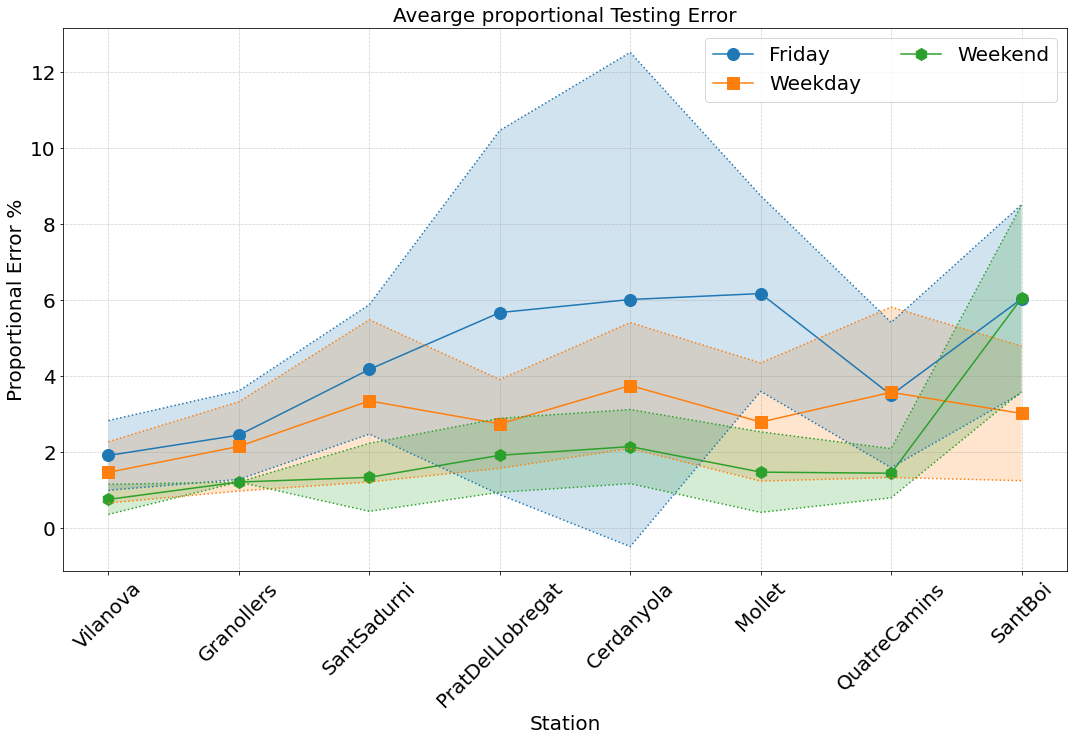

In [15]:
fsize=20
markers=['o','s','h','p','v','<','>','^']
plt.figure();
ax = df_meanTcomb.T.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)  
#plt.plot(df_meanTcomb.T['Weekday'].to_numpy()+df_stdvTcomb.T['Weekday'].to_numpy())
#plt.plot(df_meanTcomb.T['Weekday'].to_numpy()-df_stdvTcomb.T['Weekday'].to_numpy())
plt.fill_between(np.arange(8),df_meanTcomb.T['Weekday'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekday'].to_numpy(dtype=float),
                 df_meanTcomb.T['Weekday'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekday'].to_numpy(dtype=float), facecolor='#ff7f0e', alpha=0.2)
plt.fill_between(np.arange(8),df_meanTcomb.T['Friday'].to_numpy(dtype=float)+df_stdvTcomb.T['Friday'].to_numpy(dtype=float),
                 df_meanTcomb.T['Friday'].to_numpy(dtype=float)-df_stdvTcomb.T['Friday'].to_numpy(dtype=float), facecolor='#1f77b4', alpha=0.2)
plt.fill_between(np.arange(8),df_meanTcomb.T['Weekend'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekend'].to_numpy(dtype=float),
                 df_meanTcomb.T['Weekend'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekend'].to_numpy(dtype=float), facecolor='#2ca02c', alpha=0.2)

plt.plot(df_meanTcomb.T['Weekday'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekday'].to_numpy(dtype=float),color='#ff7f0e',linestyle=':')
plt.plot(df_meanTcomb.T['Weekday'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekday'].to_numpy(dtype=float),color='#ff7f0e',linestyle=':')
plt.plot(df_meanTcomb.T['Friday'].to_numpy(dtype=float)+df_stdvTcomb.T['Friday'].to_numpy(dtype=float),color='#1f77b4',linestyle=':')
plt.plot(df_meanTcomb.T['Friday'].to_numpy(dtype=float)-df_stdvTcomb.T['Friday'].to_numpy(dtype=float),color='#1f77b4',linestyle=':')
plt.plot(df_meanTcomb.T['Weekend'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekend'].to_numpy(dtype=float),color='#2ca02c',linestyle=':')
plt.plot(df_meanTcomb.T['Weekend'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekend'].to_numpy(dtype=float),color='#2ca02c',linestyle=':')

plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Station",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.xticks(rotation = 45)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best",ncol=2);
plt.savefig('AggTestErrorComb.pdf',bbox_inches='tight');

<Figure size 432x288 with 0 Axes>

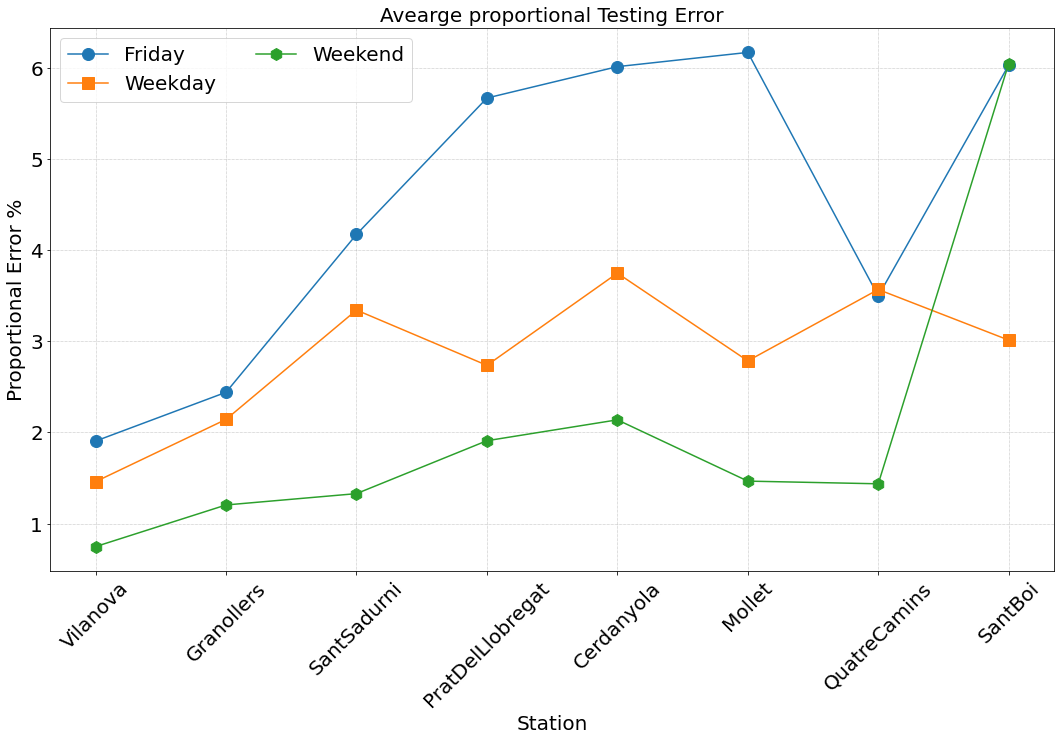

In [16]:
fsize=20
markers=['o','s','h','p','v','<','>','^']
plt.figure();
ax = df_meanTcomb.T.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)    
plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Station",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.xticks(rotation = 45)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best",ncol=2);
#plt.savefig('AggTestErrorComb.pdf',bbox_inches='tight');

In [17]:
df_meanTcomb_noTh=df_meanTcomb[['Mollet','QuatreCamins','SantBoi']]


In [18]:
dfTh_meanT=dfTh_mean.T
dfTh_meanT.rename(columns=dfTh_meanT.iloc[0], inplace = True)
dfTh_meanT.drop(dfTh_meanT.index[0], inplace = True)
dfTh_meanT

,Mollet,QuatreCamins,SantBoi
Monday,2.6584,1.83057,2.79677
Tuesday,2.68635,1.58823,2.49091
Wednesday,3.13045,3.06583,1.87807
Thursday,3.09708,4.08015,2.03495
Friday,6.10553,3.23469,7.87998
Saturday,1.38744,1.44462,4.51925
Sunday,1.6746,1.53986,6.95431


In [19]:
dfTh_stdvT=dfTh_stdv.T
dfTh_stdvT.rename(columns=dfTh_stdvT.iloc[0], inplace = True)
dfTh_stdvT.drop(dfTh_stdvT.index[0], inplace = True)
dfTh_stdvT

,Mollet,QuatreCamins,SantBoi
Monday,1.77589,1.1878,1.64313
Tuesday,2.58066,0.687174,1.75708
Wednesday,2.52857,2.3563,1.31137
Thursday,2.68737,3.07537,1.01637
Friday,3.27849,1.88116,4.36483
Saturday,0.867878,0.60389,1.22139
Sunday,1.33537,0.782377,3.07823


<Figure size 432x288 with 0 Axes>

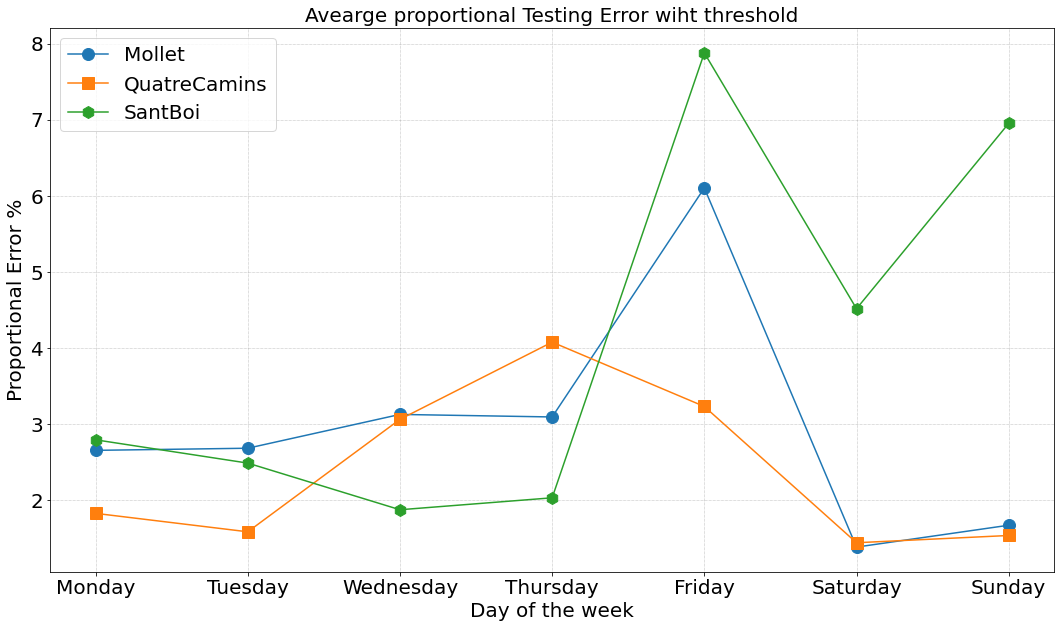

In [20]:
#dfTh_meanT.plot(figsize=(18,10))
markers=['o','s','h','p','v','<','>','^']
plt.figure();
ax = dfTh_meanT.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error wiht threshold", fontsize=fsize)    
plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Day of the week",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best");

<Figure size 432x288 with 0 Axes>

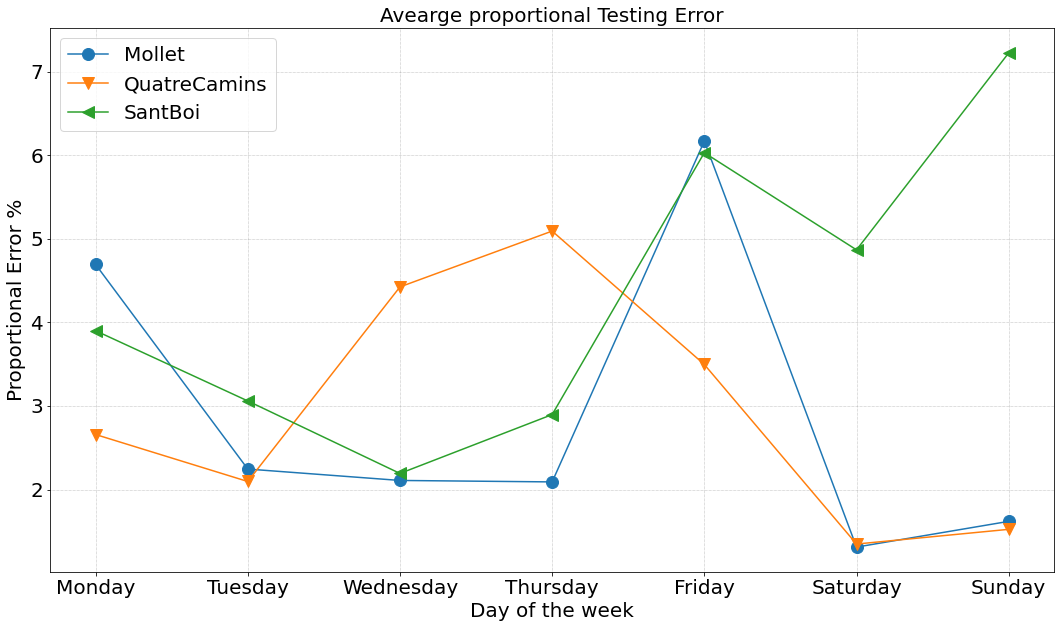

In [21]:
fsize=20
markers=['o','v','<']
plt.figure();
ax = df_meanT[['Mollet','QuatreCamins','SantBoi']].plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)    
plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Day of the week",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best")

In [22]:
dfTh_meanTcomb=dfTh_meanT.copy()
dfTh_meanTcomb.loc['Weekday']=dfTh_meanTcomb.loc[['Monday','Tuesday','Wednesday','Thursday']].mean()
dfTh_meanTcomb.drop(['Monday','Tuesday','Wednesday','Thursday'], inplace = True)
dfTh_meanTcomb.loc['Weekend']=dfTh_meanTcomb.loc[['Saturday','Sunday']].mean()
dfTh_meanTcomb.drop(['Saturday','Sunday'], inplace = True)

In [23]:
dfTh_stdvTcomb=dfTh_stdvT.copy()
dfTh_stdvTcomb.loc['Weekday']=dfTh_stdvTcomb.loc[['Monday','Tuesday','Wednesday','Thursday']].mean()
dfTh_stdvTcomb.drop(['Monday','Tuesday','Wednesday','Thursday'], inplace = True)
dfTh_stdvTcomb.loc['Weekend']=dfTh_stdvTcomb.loc[['Saturday','Sunday']].mean()
dfTh_stdvTcomb.drop(['Saturday','Sunday'], inplace = True)

In [24]:
df_meanTcomb_noTh.rename(index = {"Friday": "Friday no treshold",
                                  "Weekday":"Weekday no treshold",
                                  "Weekend":"Weekend no treshold"},
                                 inplace = True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
dfTh_meanTcomb

,Mollet,QuatreCamins,SantBoi
Friday,6.10553,3.23469,7.87998
Weekday,2.89307,2.64119,2.30018
Weekend,1.53102,1.49224,5.73678


In [26]:
dfTh_stdvTcomb

,Mollet,QuatreCamins,SantBoi
Friday,3.27849,1.88116,4.36483
Weekday,2.39312,1.82666,1.43199
Weekend,1.10162,0.693133,2.14981


In [27]:
dfTh_mean_concat=pd.concat([dfTh_meanTcomb, df_meanTcomb_noTh])

In [28]:
dfTh_mean_concat

,Mollet,QuatreCamins,SantBoi
Friday,6.10553,3.23469,7.87998
Weekday,2.89307,2.64119,2.30018
Weekend,1.53102,1.49224,5.73678
Friday no treshold,6.16926,3.49648,6.03018
Weekday no treshold,2.7849,3.56828,3.01276
Weekend no treshold,1.46583,1.43637,6.04614


<Figure size 432x288 with 0 Axes>

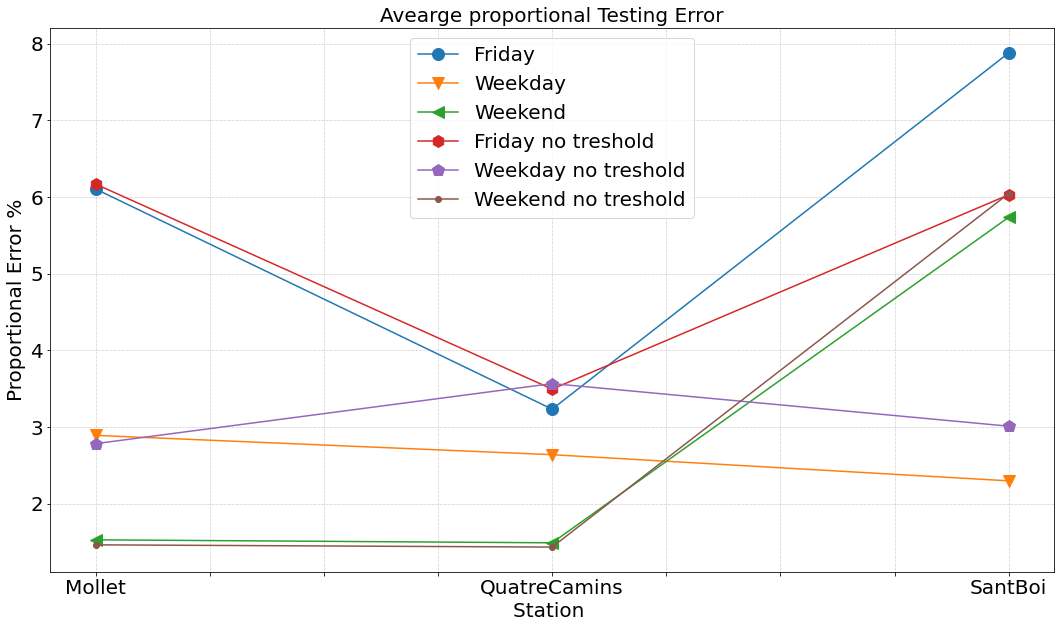

In [29]:
#dfTh_meanT.plot(figsize=(18,10))
markers=['o','v','<','h','p','.']
plt.figure();
ax = dfTh_mean_concat.T.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)    
plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Station ",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best");

## replace entries where the erroe is lower with tresholds

In [30]:
ix=df_meanTcomb[['Mollet','QuatreCamins','SantBoi']]>dfTh_meanTcomb

In [31]:
df_meanTcomb[ix]=dfTh_meanTcomb[ix]

In [32]:
df_meanTcomb

,Vilanova,Granollers,SantSadurni,PratDelLlobregat,Cerdanyola,Mollet,QuatreCamins,SantBoi
Friday,1.90538,2.44052,4.17256,5.6687,6.01313,6.10553,3.23469,6.03018
Weekday,1.45995,2.14315,3.34247,2.73609,3.74754,2.7849,2.64119,2.30018
Weekend,0.747421,1.20422,1.32857,1.90902,2.13817,1.46583,1.43637,5.73678


In [33]:
df_meanTcomb[ix]

,Vilanova,Granollers,SantSadurni,PratDelLlobregat,Cerdanyola,Mollet,QuatreCamins,SantBoi
Friday,NaN,NaN,NaN,NaN,NaN,6.10553,3.23469,NaN
Weekday,NaN,NaN,NaN,NaN,NaN,NaN,2.64119,2.30018
Weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.73678


In [79]:
df_stdvTcomb

,Vilanova,Granollers,SantSadurni,PratDelLlobregat,Cerdanyola,Mollet,QuatreCamins,SantBoi
Friday,0.919002,1.16599,1.70558,4.79768,6.50953,3.27849,1.88116,2.48263
Weekday,0.807248,1.1755,2.13742,1.16979,1.65906,1.55643,1.82666,1.43199
Weekend,0.395912,0,0.896099,0.974932,0.977125,1.06044,0.647972,2.14981


In [80]:
df_stdvTcomb[ix]=dfTh_stdvTcomb[ix]

<Figure size 432x288 with 0 Axes>

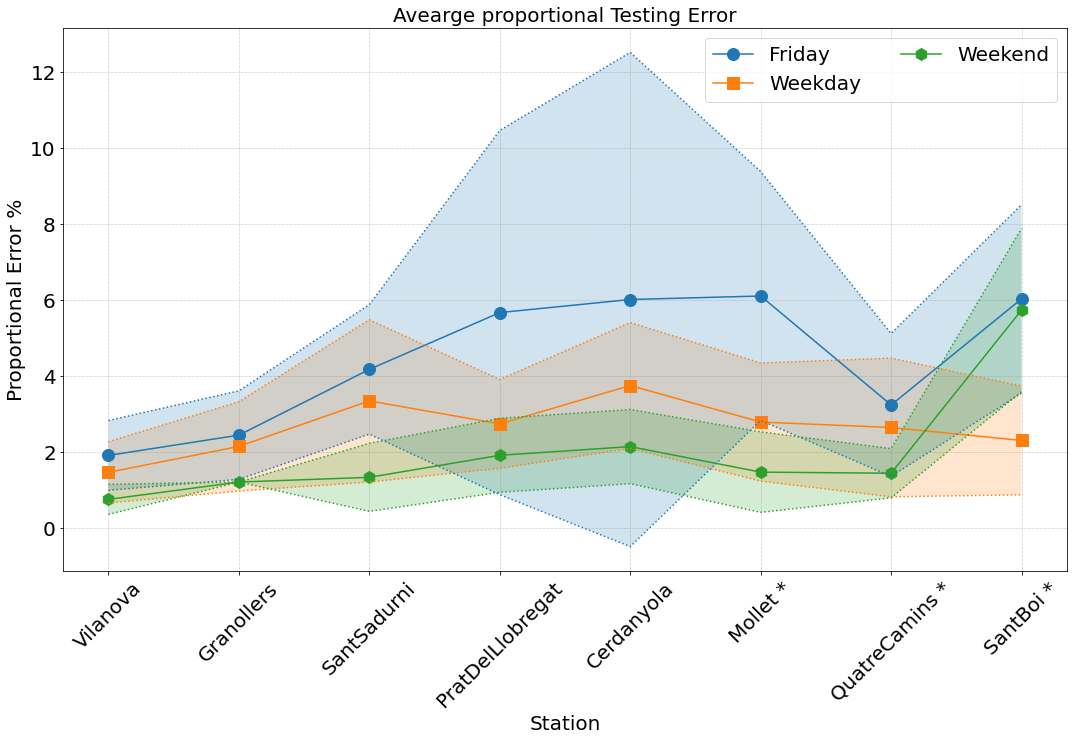

In [87]:
fsize=20
markers=['o','s','h','p','v','<','>','^']
plt.figure();
ax = df_meanTcomb.T.plot(figsize=(18,10), marker='.', markersize=12);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
plt.title("Avearge proportional Testing Error", fontsize=fsize)  
#plt.plot(df_meanTcomb.T['Weekday'].to_numpy()+df_stdvTcomb.T['Weekday'].to_numpy())
#plt.plot(df_meanTcomb.T['Weekday'].to_numpy()-df_stdvTcomb.T['Weekday'].to_numpy())
plt.fill_between(np.arange(8),df_meanTcomb.T['Weekday'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekday'].to_numpy(dtype=float),
                 df_meanTcomb.T['Weekday'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekday'].to_numpy(dtype=float), facecolor='#ff7f0e', alpha=0.2)
plt.fill_between(np.arange(8),df_meanTcomb.T['Friday'].to_numpy(dtype=float)+df_stdvTcomb.T['Friday'].to_numpy(dtype=float),
                 df_meanTcomb.T['Friday'].to_numpy(dtype=float)-df_stdvTcomb.T['Friday'].to_numpy(dtype=float), facecolor='#1f77b4', alpha=0.2)
plt.fill_between(np.arange(8),df_meanTcomb.T['Weekend'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekend'].to_numpy(dtype=float),
                 df_meanTcomb.T['Weekend'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekend'].to_numpy(dtype=float), facecolor='#2ca02c', alpha=0.2)

plt.plot(df_meanTcomb.T['Weekday'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekday'].to_numpy(dtype=float),color='#ff7f0e',linestyle=':')
plt.plot(df_meanTcomb.T['Weekday'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekday'].to_numpy(dtype=float),color='#ff7f0e',linestyle=':')
plt.plot(df_meanTcomb.T['Friday'].to_numpy(dtype=float)+df_stdvTcomb.T['Friday'].to_numpy(dtype=float),color='#1f77b4',linestyle=':')
plt.plot(df_meanTcomb.T['Friday'].to_numpy(dtype=float)-df_stdvTcomb.T['Friday'].to_numpy(dtype=float),color='#1f77b4',linestyle=':')
plt.plot(df_meanTcomb.T['Weekend'].to_numpy(dtype=float)+df_stdvTcomb.T['Weekend'].to_numpy(dtype=float),color='#2ca02c',linestyle=':')
plt.plot(df_meanTcomb.T['Weekend'].to_numpy(dtype=float)-df_stdvTcomb.T['Weekend'].to_numpy(dtype=float),color='#2ca02c',linestyle=':')

plt.ylabel("Proportional Error %",fontsize=fsize);
plt.xlabel("Station",fontsize=fsize);
plt.yticks(fontsize=fsize);
plt.xticks(fontsize=fsize);
plt.xticks(rotation = 45)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.legend(fontsize=fsize, loc="best",ncol=2);

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [word.replace('QuatreCamins','QuatreCamins *') for word in labels]
labels = [word.replace('Mollet','Mollet *') for word in labels]
labels = [word.replace('SantBoi','SantBoi *') for word in labels]
ax.set_xticklabels(labels)

plt.savefig('AggTestErrorCombMerge.pdf',bbox_inches='tight');